alpha_true: -5, beta_true: 3
alpha linreg: -5.123312222956812, beta linreg: 3.2067148127849627


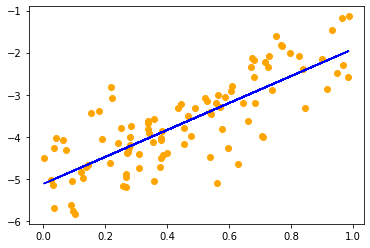

In [3]:
import random
import matplotlib.pyplot as plt

def fuzz(k):
    return k*random.gauss(0,1)

def make_data(alpha, beta, n=100, k=0.7):
    x = [random.random() for _ in range(n)]
    y = [xi*beta + alpha + fuzz(k) for xi in x]
    return x, y

def mean(x):
    return sum(x)/len(x)

def ss(x):
    mx = mean(x)
    return sum([(xi - mx)**2 for xi in x])

def standard_deviation(x):
    ssx = ss(x)
    return (ssx/len(x))**0.5

def correlation(x, y):
    mx, my = mean(x), mean(y)
    ssx, ssy = ss(x), ss(y)
    sscross = sum([(xi - mx)*(yi - my) for xi, yi in zip(x, y)])
    return sscross / (ssx * ssy)**0.5

def linreg(x, y):
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

alpha_true, beta_true = -5, 3
x, y = make_data(alpha_true, beta_true)
alpha, beta = linreg(x, y)
print(f"alpha_true: {alpha_true}, beta_true: {beta_true}")
print(f"alpha linreg: {alpha}, beta linreg: {beta}")
plt.scatter(x, y, color='orange')
plt.plot(x, [xi * beta + alpha for xi in x], color='blue');